# Métodos numéricos con SciPy.

En este notebook estudiaremos algunos métodos numéricos implementados en SciPy.

In [1]:
# Partimos cargando nuestras bibliotecas básicas.
import numpy as np
import matplotlib.pyplot as plt

## 1.  Interpolación

El paquete `scipy.interpolate` nos ofrece métodos de interpolación de datos utilizando diferentes métodos. Por ejemplo:

In [2]:
# Método de interpolación uni-dimensional:
from scipy.interpolate import interp1d

# Nuestros datos a interpolar:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])

# Interpolación lineal
f = interp1d(x, y)

# Interpolación cúbica
f2 = interp1d(x, y, kind='cubic')

In [5]:
f?

Signature:      f(x)
Type:           interp1d
String form:    <scipy.interpolate._interpolate.interp1d object at 0x7f97fc43fca0>
File:           /usr/lib/python3.11/site-packages/scipy/interpolate/_interpolate.py
Docstring:     
Interpolate a 1-D function.

.. legacy:: class

`x` and `y` are arrays of values used to approximate some function f:
``y = f(x)``. This class returns a function whose call method uses
interpolation to find the value of new points.

Parameters
----------
x : (npoints, ) array_like
    A 1-D array of real values.
y : (..., npoints, ...) array_like
    A N-D array of real values. The length of `y` along the interpolation
    axis must be equal to the length of `x`. Use the ``axis`` parameter
    to select correct axis. Unlike other interpolators, the default
    interpolation axis is the last axis of `y`.
kind : str or int, optional
    Specifies the kind of interpolation as a string or as an integer
    specifying the order of the spline interpolator to use.
   

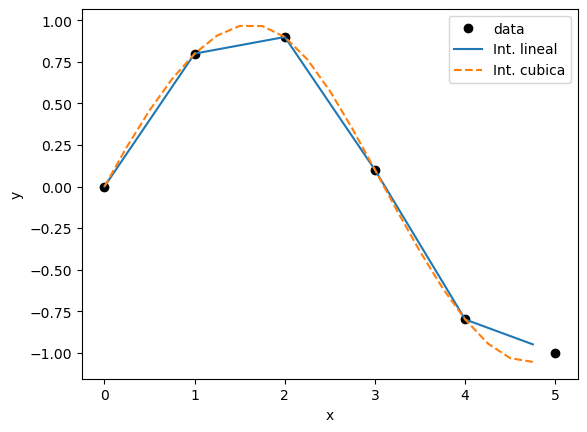

In [4]:
# Valores de x donde evaluaremos la interpolación
#xnew = np.linspace(0, 5, num=41, endpoint=True)
xnew = np.arange(0, 5, 0.25)

# Gráficamos los datos y las interpolaciones:
fig, ax = plt.subplots()

ax.plot(x, y, 'ok', label='data')
ax.plot(xnew, f(xnew), '-', label='Int. lineal')
ax.plot(xnew, f2(xnew), '--', label='Int. cubica')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

## 2. Aproximación 

Estos métodos permiten aproximar un conjunto de datos mediante una curva que recupere la tendencia global de los mismos, pero no necesariamente los exprese de forma exacta. El ejemplo más usual es la **regresión lineal**.

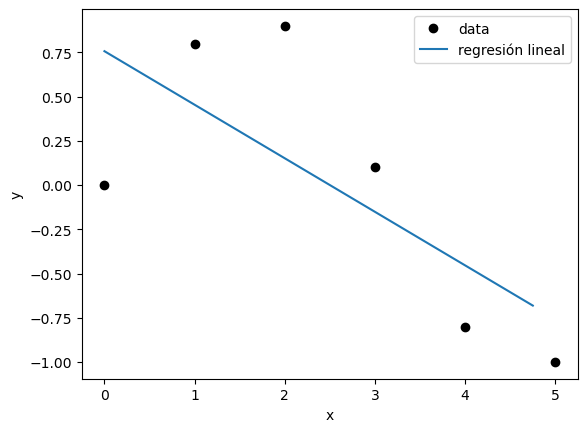

In [7]:
# La regresión lineal ajusta una recta a los datos:

from scipy.stats import linregress

m, n, r_value, p_value, std_err = linregress(x, y)

# Graficamos:
fig, ax = plt.subplots()
ax.plot(x, y, 'ok', label='data')
ax.plot(xnew, m*xnew + n, '-', label='regresión lineal')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

## 3. Ajuste de curvas

Técnica utilizada en la búsqueda de modelos que puedan representar un conjunto de datos de la forma más fielmente posible. Se considera que los datos pueden contener ruidos o errores que los separen del modelo teórico probado, de modo que el ajuste de curvas también se considera un método de aproximación.

In [12]:
from scipy.optimize import curve_fit

In [13]:
# Definimos la función que seguirán nuestros datos.
# También utilizamos esta definición en el ajuste. 

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generamos datos con ruido a partir de la función
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

En este caso, nuestros datos siguen la función $f(x) = 2.5 \exp(-1.3 x) + 0.5$.

Ahora ajustamos los parámetros de esta curva utilizando el método `curve_fit`:

In [16]:
popt, pcov = curve_fit(func, xdata, ydata)

print("Parámetros optimizados: ", popt)
print("Matriz de covarianza:")
print(pcov)

Parámetros optimizados:  [2.45686432 1.21586057 0.47534632]
Matriz de covarianza:
[[ 0.01793777  0.00656022 -0.00121733]
 [ 0.00656022  0.02238765  0.00733457]
 [-0.00121733  0.00733457  0.00418203]]


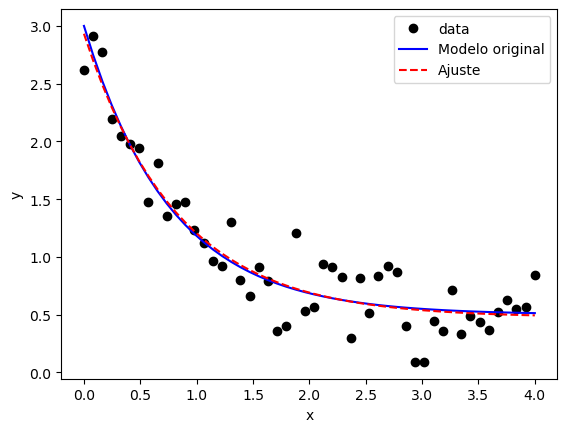

In [17]:
# Finalmente, graficamos los datos, la curva original y la ajustada:

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'ok', label="data")
ax.plot(xdata, func(xdata, 2.5, 1.3, 0.5), '-b', label="Modelo original")
ax.plot(xdata, func(xdata, *popt), '--r', label="Ajuste")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')